# Visualize RBR pressure sensor data
Visualize RBR pressure sensor data QC and statistical parameters from ROXSI 2022 Asilomar Small-Scale Array measurements.

In [2]:
# Imports
import os
import sys
import glob
import numpy as np
import pandas as pd
import xarray as xr
from pyproj import Proj
import cmocean
import ipympl
import matplotlib.pyplot as plt
# Interactive plots
%matplotlib widget 

In [6]:
# Paths
rootdir = r'/media/mikapm/T7 Shield/ROXSI/Asilomar2022/SmallScaleArray/'
data_duet = os.path.join(rootdir, 'RBRDuetDT', 'Level1', 'netcdf')
data_solo = os.path.join(rootdir, 'RBRSoloD', 'Level1', 'netcdf')
bathydir = os.path.join(rootdir, 'Bathy')

# Read API key from environment variable
api_key = os.environ["OPENAI_API_KEY"]

# Read large-scale array mooring locations table
fn_lsa = os.path.join(rootdir, 'ROXSI2022_LSA_mooring_locations.csv')
df_lsa = pd.read_csv(fn_lsa).set_index('Mooring')

# Pressure sensor serial numbers list
sers = ['210356', '210357', '210358', '210359', '210360', '210361',
        '41428', '41429', '124107', '124108', '124109', '210362']

# Visualize one date or all dates?
date = '2022-07-01'
# date = 'all'

## Read and plot bathymetry
First plot closeups of SSA bathymetry with RBRSoloD moorings marked with triangles and RBRDuetDT moorings marked with squares.

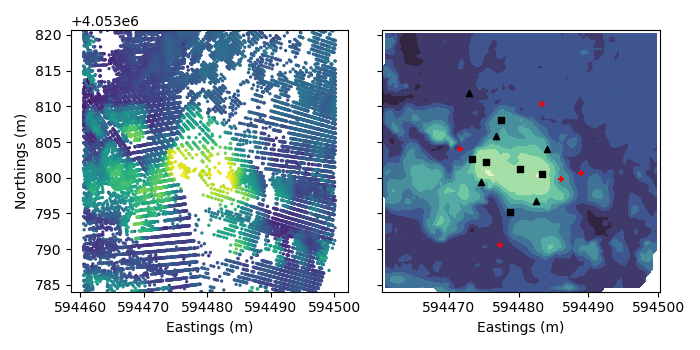

In [50]:
fn_bathy = os.path.join(bathydir, 'Asilomar_2022_SSA_bathy.nc')
dsb = xr.decode_cf(xr.open_dataset(fn_bathy, decode_coords='all'))

# Initialize figure and plot
plt.close()
fig1, axes = plt.subplots(figsize=(7,3.5), ncols=2, constrained_layout=True,
                         sharey=True)
axes[0].scatter(dsb.x_pts, dsb.y_pts, c=dsb.z_pts, s=2)
axes[0].set_xlabel('Eastings (m)')
axes[0].set_ylabel('Northings (m)')
axes[1].contourf(dsb.eastings, dsb.northings, dsb.z_utm, vmin=-8.0, vmax=-3.5,
                 cmap=cmocean.cm.deep_r)
# Mooring locations
s = 20 # markersize
axes[1].scatter(dsb.C1_utm[0].item(), dsb.C1_utm[1].item(), marker='+', color='r', s=s)
axes[1].scatter(dsb.C2_utm[0].item(), dsb.C2_utm[1].item(), marker='s', color='k', s=s)
axes[1].scatter(dsb.C3_utm[0].item(), dsb.C3_utm[1].item(), marker='s', color='k', s=s)
axes[1].scatter(dsb.C4_utm[0].item(), dsb.C4_utm[1].item(), marker='s', color='k', s=s)
axes[1].scatter(dsb.C5_utm[0].item(), dsb.C5_utm[1].item(), marker='+', color='r', s=s)
axes[1].scatter(dsb.C6_utm[0].item(), dsb.C6_utm[1].item(), marker='+', color='r', s=s)
axes[1].scatter(dsb.L1_utm[0].item(), dsb.L1_utm[1].item(), marker='+', color='r', s=s)
axes[1].scatter(dsb.L2_utm[0].item(), dsb.L2_utm[1].item(), marker='s', color='k', s=s)
axes[1].scatter(dsb.L4_utm[0].item(), dsb.L4_utm[1].item(), marker='s', color='k', s=s)
axes[1].scatter(dsb.L5_utm[0].item(), dsb.L5_utm[1].item(), marker='+', color='r', s=s)
axes[1].scatter(dsb.C1_5_utm[0], dsb.C1_5_utm[1], marker='s', color='k', s=s)
axes[1].scatter(dsb.C2L2_utm[0].item(), dsb.C2L2_utm[1].item(), marker='^', color='k', s=s)
axes[1].scatter(dsb.C2L4_utm[0].item(), dsb.C2L4_utm[1].item(), marker='^', color='k', s=s)
axes[1].scatter(dsb.C4L2_utm[0].item(), dsb.C4L2_utm[1].item(), marker='^', color='k', s=s)
axes[1].scatter(dsb.C4L4_utm[0].item(), dsb.C4L4_utm[1].item(), marker='^', color='k', s=s)
axes[1].scatter(dsb.M1_utm[0], dsb.M1_utm[1], marker='^', color='k', s=s)
axes[1].set_xlabel('Eastings (m)')

plt.tight_layout()
plt.show()

In [49]:
plt.clf()

## RBR wave statistics
Plots of spectral wave parameters from linear surface reconstructions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


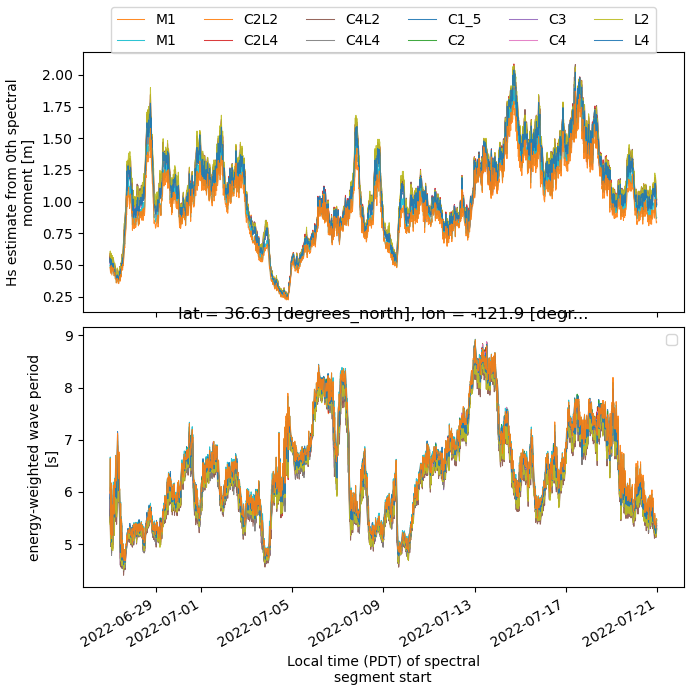

In [53]:
# List all spectral RBR files (linear surface reconstruction)
fns_duet = sorted(glob.glob(os.path.join(data_duet, '*RBRDuetDT*_spec_lin.nc')))
fns_solo = sorted(glob.glob(os.path.join(data_solo, '*RBRSoloD*_spec_lin.nc')))

# Initialize figure
fig2, axes = plt.subplots(figsize=(7,7), nrows=2, constrained_layout=True,
                         sharex=True)

# Iterate over files and plot wave parameter time series
lw = 0.75 # Linewidth
ap = 0.9 # Alpha
for fnd, fns in zip(fns_duet, fns_solo):
    # Read Duet & Solo netcdfs to xr.Datasets
    dsd = xr.decode_cf(xr.open_dataset(fnd, decode_coords='all'))
    dss = xr.decode_cf(xr.open_dataset(fns, decode_coords='all'))
    # Plot Hs timeseries on first row
    dsd.Hm0.plot(ax=axes[0], label=dsd.attrs['mooring_ID'], linewidth=lw, 
                 alpha=ap)
    dss.Hm0.plot(ax=axes[0], label=dss.attrs['mooring_ID'], linewidth=lw, 
                 alpha=ap)
    # Plot energy-weighted mean period on second row
    dsd.Te.plot(ax=axes[1], linewidth=lw, alpha=ap)
    dss.Te.plot(ax=axes[1], linewidth=lw, alpha=ap)
axes[0].set_title(None)
axes[0].set_ylabel(r'$H_{\mathrm{s}}$ (lin. rec.) [m]')
axes[1].set_ylabel(r'$T_{\mathrm{m}}$ (lin. rec.) [s]')

# Legend for first row
handles, labels = axes[0].get_legend_handles_labels()
order = [11, 9, 1, 3, 5, 7, 0, 2, 4, 6, 8, 10]
plt.legend()
# Shrink current axis's height by 10% on the bottom
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend above current axis
# axes[0].legend( 
axes[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
               loc='upper center', bbox_to_anchor=(0.5, 1.2),
               fancybox=True, ncol=6)

for ax in axes:
    ax.set_title(None)
    ax.set_xlabel(None)

plt.tight_layout()
plt.show()


In [48]:
plt.clf()